In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

In [2]:
emotions = {
    "emotion-4.1": "Anger, Hate, Contempt, Disgust",
    "emotion-4.2": "Embarrassment, Guilt, Shame, Sadness",
    "emotion-4.3": "Admiration, Love",
    "emotion-4.4": "Optimism, Hope",
    "emotion-4.5": "Joy, Happiness",
    "emotion-4.6": "Pride, including National Pride",
    "emotion-4.7": "Fear, Pessimism",
    "emotion-4.8": "Amusement",
    "emotion-4.9": "Positive-other",
    "emotion-4.10": "Negative-other"
}

emotion_list = [
    "Anger, Hate, Contempt, Disgust",
    "Embarrassment, Guilt, Shame, Sadness",
    "Admiration, Love",
    "Optimism, Hope",
    "Joy, Happiness",
    "Pride, including National Pride",
    "Fear, Pessimism",
    "Amusement",
    "Positive-other",
    "Negative-other"
]

In [3]:
GoEmotion_label_list = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

In [4]:
df = pd.read_csv('GoEmotion.tsv', sep='\t', names=["text", "unknown", "id"], header=None)
df

,text,unknown,id
0,I’m really sorry about your situation :( Altho...,25,eecwqtt
1,It's wonderful because it's awful. At not with.,0,ed5f85d
2,"Kings fan here, good luck to you guys! Will be...",13,een27c3
3,"I didn't know that, thank you for teaching me ...",15,eelgwd1
4,They got bored from haunting earth for thousan...,27,eem5uti
...,...,...,...
5422,Thanks. I was diagnosed with BP 1 after the ho...,15,efeeasc
5423,Well that makes sense.,4,ef9c7s3
5424,Daddy issues [NAME],27,efbiugo
5425,So glad I discovered that subreddit a couple m...,0,efbvgp9


In [5]:
df = pd.read_pickle("annotated_GoEmotion.p")
df

,text,unknown,id,emotion
0,I’m really sorry about your situation :( Altho...,25,eecwqtt,"{'emotion-4.1': 0.005607937928289175, 'emotion..."
1,It's wonderful because it's awful. At not with.,0,ed5f85d,"{'emotion-4.1': 0.17552705109119415, 'emotion-..."
2,"Kings fan here, good luck to you guys! Will be...",13,een27c3,"{'emotion-4.1': 0.0019931080751121044, 'emotio..."
3,"I didn't know that, thank you for teaching me ...",15,eelgwd1,"{'emotion-4.1': 0.0018992444965988398, 'emotio..."
4,They got bored from haunting earth for thousan...,27,eem5uti,"{'emotion-4.1': 0.007150435354560614, 'emotion..."
...,...,...,...,...
5422,Thanks. I was diagnosed with BP 1 after the ho...,15,efeeasc,"{'emotion-4.1': 0.01178283803164959, 'emotion-..."
5423,Well that makes sense.,4,ef9c7s3,"{'emotion-4.1': 0.0039648981764912605, 'emotio..."
5424,Daddy issues [NAME],27,efbiugo,"{'emotion-4.1': 0.027727019041776657, 'emotion..."
5425,So glad I discovered that subreddit a couple m...,0,efbvgp9,"{'emotion-4.1': 0.0019346955232322216, 'emotio..."


In [6]:
# df = df.rename({"unknown": "ground_truth_label"}, axis=1)
# df

In [15]:
emotion_features_raw = []
for row in df.itertuples():
    emotion = row[-1]
    # print(emotion)
    highest_emotion_key = max(emotion, key=emotion.get)
    # print(highest_emotion_key)
    translate_emotion = emotions[highest_emotion_key]
    # print(translate_emotion)

    emotion_features_raw.append({
        "highest_confidence_emotion": translate_emotion
    })

    # truth_label = row[2].split(", ")
    # a = [int(item) for item in truth_label]
    # print(type(a))
    # print(a)
    # break
    # emotion = {}
    # for k, v in post_emotion.items():
    #     emotion[emotions[k]] = v
    #
    # emotion_features_raw.append(emotion)

emotion_features_df = pd.DataFrame(emotion_features_raw, index=df.index)
emotion_df = pd.concat([df, emotion_features_df], axis=1)
emotion_df

,text,unknown,id,emotion,highest_confidence_emotion
0,I’m really sorry about your situation :( Altho...,25,eecwqtt,"{'emotion-4.1': 0.005607937928289175, 'emotion...",Negative-other
1,It's wonderful because it's awful. At not with.,0,ed5f85d,"{'emotion-4.1': 0.17552705109119415, 'emotion-...",Negative-other
2,"Kings fan here, good luck to you guys! Will be...",13,een27c3,"{'emotion-4.1': 0.0019931080751121044, 'emotio...","Optimism, Hope"
3,"I didn't know that, thank you for teaching me ...",15,eelgwd1,"{'emotion-4.1': 0.0018992444965988398, 'emotio...",Positive-other
4,They got bored from haunting earth for thousan...,27,eem5uti,"{'emotion-4.1': 0.007150435354560614, 'emotion...",Positive-other
...,...,...,...,...,...
5422,Thanks. I was diagnosed with BP 1 after the ho...,15,efeeasc,"{'emotion-4.1': 0.01178283803164959, 'emotion-...",Positive-other
5423,Well that makes sense.,4,ef9c7s3,"{'emotion-4.1': 0.0039648981764912605, 'emotio...",Positive-other
5424,Daddy issues [NAME],27,efbiugo,"{'emotion-4.1': 0.027727019041776657, 'emotion...",Negative-other
5425,So glad I discovered that subreddit a couple m...,0,efbvgp9,"{'emotion-4.1': 0.0019346955232322216, 'emotio...","Joy, Happiness"


In [20]:
import re

In [24]:
first_dict = []
second_dict = []
third_dict = []
fourth_dict = []

for row in emotion_df.itertuples():
    id = row[3]
    text = row[1]
    unknown = row[2]
    emotion = row[-1]
    truth_label_str = re.split(', |,',row[2])
    truth_label_list = [int(item) for item in truth_label_str]
    num_truth_label = len(truth_label_list)
    ground_truth_label = GoEmotion_label_list[truth_label_list[0]]
    first_dict.append({
        "id": id,
        "text": text,
        "ground_truth_label": ground_truth_label,
        "highest_confidence_emotion": emotion
    })
first_df = pd.DataFrame(first_dict, index=df.index)
first_df

,id,text,ground_truth_label,highest_confidence_emotion
0,eecwqtt,I’m really sorry about your situation :( Altho...,sadness,Negative-other
1,ed5f85d,It's wonderful because it's awful. At not with.,admiration,Negative-other
2,een27c3,"Kings fan here, good luck to you guys! Will be...",excitement,"Optimism, Hope"
3,eelgwd1,"I didn't know that, thank you for teaching me ...",gratitude,Positive-other
4,eem5uti,They got bored from haunting earth for thousan...,neutral,Positive-other
...,...,...,...,...
5422,efeeasc,Thanks. I was diagnosed with BP 1 after the ho...,gratitude,Positive-other
5423,ef9c7s3,Well that makes sense.,approval,Positive-other
5424,efbiugo,Daddy issues [NAME],neutral,Negative-other
5425,efbvgp9,So glad I discovered that subreddit a couple m...,admiration,"Joy, Happiness"


In [25]:
for row in emotion_df.itertuples():
    id = row[3]
    text = row[1]
    unknown = row[2]
    emotion = row[-1]
    truth_label_str = re.split(', |,',row[2])
    truth_label_list = [int(item) for item in truth_label_str]
    num_truth_label = len(truth_label_list)
    if num_truth_label > 1:
        ground_truth_label = GoEmotion_label_list[truth_label_list[1]]
        second_dict.append({
        "id": id,
        "text": text,
        "ground_truth_label": ground_truth_label,
        "highest_confidence_emotion": emotion
        })
    else:
        continue
second_df = pd.DataFrame(second_dict)
second_df

,id,text,ground_truth_label,highest_confidence_emotion
0,eeaf7fg,[NAME] has towed the line of the Dark Side. He...,disapproval,"Admiration, Love"
1,ee3yyz3,Lol! But I love your last name though. XD,love,Amusement
2,eeccgbb,"It's great that you're a recovering addict, th...",curiosity,Positive-other
3,eezp1cd,if the pain doesn't go away after 4 hours or s...,neutral,Negative-other
4,ednoz16,"Watch Vegan Gains’ video on that, he had it wh...",neutral,Positive-other
...,...,...,...,...
832,eevy72t,Hahaha so I’m no longer going to worry about i...,optimism,Amusement
833,eebo774,This will be me a year from now. Not fair at all.,embarrassment,"Anger, Hate, Contempt, Disgust"
834,eepx8q5,"I know, right?! I was literally in tears Satur...",sadness,Amusement
835,eeqrhdo,"They are children, they have no souls.",caring,"Anger, Hate, Contempt, Disgust"


In [26]:
for row in emotion_df.itertuples():
    id = row[3]
    text = row[1]
    unknown = row[2]
    emotion = row[-1]
    truth_label_str = re.split(', |,',row[2])
    truth_label_list = [int(item) for item in truth_label_str]
    num_truth_label = len(truth_label_list)
    if num_truth_label > 2:
        ground_truth_label = GoEmotion_label_list[truth_label_list[2]]
        third_dict.append({
        "id": id,
        "text": text,
        "ground_truth_label": ground_truth_label,
        "highest_confidence_emotion": emotion
        })
    else:
        continue
third_df = pd.DataFrame(third_dict)
third_df

,id,text,ground_truth_label,highest_confidence_emotion
0,ef8zi31,"Hi, [NAME]! I thought I would stop by and wish...",optimism,"Joy, Happiness"
1,ee4sivg,That was an incredibly dumb thing to do. [NAME...,disgust,"Anger, Hate, Contempt, Disgust"
2,ed2km2n,"[NAME], [NAME] is starting a marriage with inf...",optimism,"Optimism, Hope"
3,ed27jk8,"Other than a lame attempt of being insulting, ...",curiosity,Negative-other
4,eecmenx,Break up and be firm about. You’ve already adm...,curiosity,"Anger, Hate, Contempt, Disgust"
...,...,...,...,...
58,eeiav5d,aye they buggin for no reason im just saying g...,optimism,Positive-other
59,efdab2p,Im not 😀 Glad you realize your mistake and why...,realization,Amusement
60,ef5oovf,Here in America too. Those counter protesting ...,disapproval,"Anger, Hate, Contempt, Disgust"
61,edf79f2,Ah!! Was not expecting to read that this morni...,realization,"Admiration, Love"


In [27]:
for row in emotion_df.itertuples():
    id = row[3]
    text = row[1]
    unknown = row[2]
    emotion = row[-1]
    truth_label_str = re.split(', |,',row[2])
    truth_label_list = [int(item) for item in truth_label_str]
    num_truth_label = len(truth_label_list)
    if num_truth_label > 3:
        ground_truth_label = GoEmotion_label_list[truth_label_list[3]]
        fourth_dict.append({
        "id": id,
        "text": text,
        "ground_truth_label": ground_truth_label,
        "highest_confidence_emotion": emotion
        })
    else:
        continue
fourth_df = pd.DataFrame(fourth_dict)
fourth_df

,id,text,ground_truth_label,highest_confidence_emotion
0,eew64o4,Wow! That's awesome! Congratulations! Its wond...,surprise,"Joy, Happiness"
1,eeep6yl,"I'm glad you have your kids, but have you seen...",joy,"Joy, Happiness"


In [28]:
first_dict

[{'id': 'eecwqtt',
  'text': 'I’m really sorry about your situation :( Although I love the names Sapphira, Cirilla, and Scarlett!',
  'ground_truth_label': 'sadness',
  'highest_confidence_emotion': 'Negative-other'},
 {'id': 'ed5f85d',
  'text': "It's wonderful because it's awful. At not with.",
  'ground_truth_label': 'admiration',
  'highest_confidence_emotion': 'Negative-other'},
 {'id': 'een27c3',
  'text': 'Kings fan here, good luck to you guys! Will be an interesting game to watch! ',
  'ground_truth_label': 'excitement',
  'highest_confidence_emotion': 'Optimism, Hope'},
 {'id': 'eelgwd1',
  'text': "I didn't know that, thank you for teaching me something today!",
  'ground_truth_label': 'gratitude',
  'highest_confidence_emotion': 'Positive-other'},
 {'id': 'eem5uti',
  'text': 'They got bored from haunting earth for thousands of years and ultimately moved on to the afterlife.',
  'ground_truth_label': 'neutral',
  'highest_confidence_emotion': 'Positive-other'},
 {'id': 'ef2n

In [29]:
import json
with open("GoEmotion/annotated_GoEmotion_separate_first_label.jsonl", 'w') as f:
    f.write(json.dumps(first_dict))
with open("GoEmotion/annotated_GoEmotion_separate_second_label.jsonl", 'w') as f:
    f.write(json.dumps(second_dict))
with open("GoEmotion/annotated_GoEmotion_separate_third_label.jsonl", 'w') as f:
    f.write(json.dumps(third_dict))
with open("GoEmotion/annotated_GoEmotion_separate_fourth_label.jsonl", 'w') as f:
    f.write(json.dumps(fourth_dict))

In [31]:
all_dict = []
all_dict.extend(first_dict)
all_dict.extend(second_dict)
all_dict.extend(third_dict)
all_dict.extend(fourth_dict)
all_dict

[{'id': 'eecwqtt',
  'text': 'I’m really sorry about your situation :( Although I love the names Sapphira, Cirilla, and Scarlett!',
  'ground_truth_label': 'sadness',
  'highest_confidence_emotion': 'Negative-other'},
 {'id': 'ed5f85d',
  'text': "It's wonderful because it's awful. At not with.",
  'ground_truth_label': 'admiration',
  'highest_confidence_emotion': 'Negative-other'},
 {'id': 'een27c3',
  'text': 'Kings fan here, good luck to you guys! Will be an interesting game to watch! ',
  'ground_truth_label': 'excitement',
  'highest_confidence_emotion': 'Optimism, Hope'},
 {'id': 'eelgwd1',
  'text': "I didn't know that, thank you for teaching me something today!",
  'ground_truth_label': 'gratitude',
  'highest_confidence_emotion': 'Positive-other'},
 {'id': 'eem5uti',
  'text': 'They got bored from haunting earth for thousands of years and ultimately moved on to the afterlife.',
  'ground_truth_label': 'neutral',
  'highest_confidence_emotion': 'Positive-other'},
 {'id': 'ef2n

In [33]:
with open("GoEmotion/annotated_GoEmotion_all.jsonl", 'w') as f:
    f.write(json.dumps(all_dict))

In [30]:
df_list = [first_df, second_df, third_df, fourth_df]
all_df = pd.concat(df_list)
all_df

,id,text,ground_truth_label,highest_confidence_emotion
0,eecwqtt,I’m really sorry about your situation :( Altho...,sadness,Negative-other
1,ed5f85d,It's wonderful because it's awful. At not with.,admiration,Negative-other
2,een27c3,"Kings fan here, good luck to you guys! Will be...",excitement,"Optimism, Hope"
3,eelgwd1,"I didn't know that, thank you for teaching me ...",gratitude,Positive-other
4,eem5uti,They got bored from haunting earth for thousan...,neutral,Positive-other
...,...,...,...,...
60,ef5oovf,Here in America too. Those counter protesting ...,disapproval,"Anger, Hate, Contempt, Disgust"
61,edf79f2,Ah!! Was not expecting to read that this morni...,realization,"Admiration, Love"
62,ef7ekkf,Sure dude. Although I’d say my rate at dispens...,neutral,Amusement
0,eew64o4,Wow! That's awesome! Congratulations! Its wond...,surprise,"Joy, Happiness"


In [35]:
ground_truth_feature_dict = []
emotion_feature_dict = []
for row in all_df.itertuples():
    ground_truth_label = row[3]
    emotion_label = row[4]
    ground_truth_dict = {}
    for ground_truth in GoEmotion_label_list:
        ground_truth_dict[ground_truth] = 0
    ground_truth_dict[ground_truth_label] = 1

    emotion_dict = {}
    for emotion in emotion_list:
        emotion_dict[emotion] = 0
    emotion_dict[emotion_label] = 1

    ground_truth_feature_dict.append(ground_truth_dict)
    emotion_feature_dict.append(emotion_dict)

ground_truth_feature_df = pd.DataFrame(ground_truth_feature_dict, index=all_df.index)
emotion_feature_df = pd.DataFrame(emotion_feature_dict, index=all_df.index)

emotion_feature_df

,"Anger, Hate, Contempt, Disgust","Embarrassment, Guilt, Shame, Sadness","Admiration, Love","Optimism, Hope","Joy, Happiness","Pride, including National Pride","Fear, Pessimism",Amusement,Positive-other,Negative-other
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
60,1,0,0,0,0,0,0,0,0,0
61,0,0,1,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,1,0,0,0,0,0


In [36]:
ground_truth_feature_df

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
corr = pd.concat([ground_truth_feature_df, emotion_feature_df], axis=1).corr().round(2)
corr_matrix = corr[emotion_list].loc[GoEmotion_label_list]
print(corr_matrix)

                Anger, Hate, Contempt, Disgust  \
admiration                               -0.11   
amusement                                -0.09   
anger                                     0.30   
annoyance                                 0.24   
approval                                 -0.07   
caring                                   -0.03   
confusion                                -0.02   
curiosity                                -0.01   
desire                                   -0.03   
disappointment                            0.02   
disapproval                               0.07   
disgust                                   0.15   
embarrassment                             0.00   
excitement                               -0.05   
fear                                     -0.01   
gratitude                                -0.09   
grief                                    -0.01   
joy                                      -0.06   
love                                     -0.04   


In [41]:
fig, ax = plt.subplots(figsize=[12, 9], dpi=800)

sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.xticks(rotation=15, ha='right')
# plt.yticks(np.arange(0.55, 0.75, 0.02))
plt.title("Correlation Matrix (SemEval2018)")
ax.set_xlabel('spanEmotion')
ax.set_ylabel('Ground Truth')
# plt.legend()
plt.savefig("GoEmotion/corr_matrix_GoEmotion.png", facecolor="white")
plt.show()

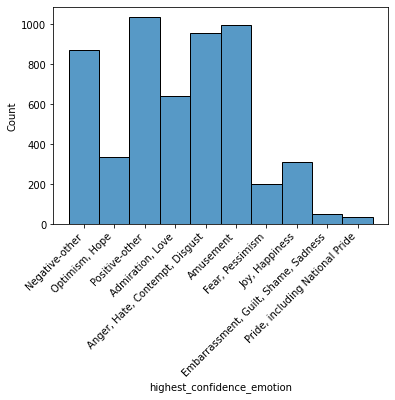

In [17]:
# sns.histplot(emotion_df["highest_confidence_emotion"])
# plt.xticks(rotation=45, ha='right')
# plt.show()